In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
%matplotlib inline
import seaborn as sns

In [2]:
# calling and reading data and naming it iris_data
path=("C:/Users/isis1/OneDrive/Documents/combines_sets.csv")
combine = pd.read_csv(path)
#display first 5 rows of the data
combine.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,National prevalence of diabates(%),DTP,hipatitis B,polio_vaccines,measles
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,33736494.0,17.2,17.3,0.479,10.1,6.3,74.0,59.33,70.0,54.5
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,327582.0,17.5,17.5,0.476,10.0,6.3,74.0,59.33,70.0,54.5
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,31731688.0,17.7,17.7,0.470,9.9,6.3,74.0,59.33,70.0,54.5
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,3696958.0,17.9,18.0,0.463,9.8,6.3,74.0,59.33,70.0,54.5
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,2978599.0,18.2,18.2,0.454,9.5,6.3,74.0,59.33,70.0,54.5


In [3]:
#reading the dataset types
print(combine.dtypes)

Country                                object
Year                                    int64
Status                                 object
Life expectancy                       float64
Adult Mortality                         int64
infant deaths                           int64
Alcohol                               float64
percentage expenditure                float64
Hepatitis B                           float64
Measles                                 int64
 BMI                                  float64
under-five deaths                       int64
Polio                                   int64
Total expenditure                     float64
Diphtheria                              int64
 HIV/AIDS                             float64
GDP                                   float64
Population                            float64
 thinness  1-19 years                 float64
 thinness 5-9 years                   float64
Income composition of resources       float64
Schooling                         

In [4]:
#statistical analysis of dataset attributes
print(combine.describe())
print(combine.describe(include="all"))

              Year  Life expectancy   Adult Mortality  infant deaths  \
count   270.000000        270.000000       270.000000     270.000000   
mean   2012.500000         72.392963       122.611111      50.511111   
std       1.710997          5.314593        71.121765     163.574494   
min    2010.000000         58.800000         6.000000       0.000000   
25%    2011.000000         68.100000        67.250000       1.000000   
50%    2012.500000         73.900000       125.000000       5.500000   
75%    2014.000000         75.800000       179.000000      22.000000   
max    2015.000000         85.000000       294.000000    1200.000000   

          Alcohol  percentage expenditure  Hepatitis B      Measles   \
count  227.000000              270.000000   264.000000    270.000000   
mean     1.883656              515.403904    88.549242   2995.955556   
std      2.446294             1241.183427    16.716987  10235.631503   
min      0.010000                0.000000     4.000000      0.0

In [6]:
a=list(combine.columns)
b=[]
for i in a:
    c=combine[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,43
7,percentage expenditure,0
8,Hepatitis B,6
9,Measles,0


In [8]:
#replacing missing values with mean value
mean_value=combine['GDP'].mean()
combine['GDP'].fillna(value=mean_value, inplace=True)
combine.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,National prevalence of diabates(%),DTP,hipatitis B,polio_vaccines,measles
0,Afghanistan,2015,Developing,65.0,263,62,0.010000,71.279624,65.0,1154,...,3.373649e+07,17.2,17.3,0.479,10.1,6.3,74.0,59.33,70.00,54.5
1,Afghanistan,2014,Developing,59.9,271,64,0.010000,73.523582,62.0,492,...,3.275820e+05,17.5,17.5,0.476,10.0,6.3,74.0,59.33,70.00,54.5
2,Afghanistan,2013,Developing,59.9,268,66,0.010000,73.219243,64.0,430,...,3.173169e+07,17.7,17.7,0.470,9.9,6.3,74.0,59.33,70.00,54.5
3,Afghanistan,2012,Developing,59.5,272,69,0.010000,78.184215,67.0,2787,...,3.696958e+06,17.9,18.0,0.463,9.8,6.3,74.0,59.33,70.00,54.5
4,Afghanistan,2011,Developing,59.2,275,71,0.010000,7.097109,68.0,3013,...,2.978599e+06,18.2,18.2,0.454,9.5,6.3,74.0,59.33,70.00,54.5
5,Afghanistan,2010,Developing,58.8,279,74,0.010000,79.679367,66.0,1989,...,2.883167e+06,18.4,18.4,0.448,9.2,6.3,74.0,59.33,70.00,54.5
6,Armenia,2015,Developing,74.8,118,1,1.883656,0.000000,94.0,33,...,2.916950e+05,2.1,2.2,0.741,12.7,2.6,93.5,93.66,85.50,94.0
7,Armenia,2014,Developing,74.6,12,1,3.910000,295.608714,93.0,13,...,2.962200e+04,2.1,2.1,0.739,12.7,2.6,93.5,93.66,85.50,94.0
8,Armenia,2013,Developing,74.4,123,1,3.790000,279.429081,95.0,10,...,2.893590e+05,2.1,2.1,0.736,12.7,2.6,93.5,93.66,85.50,94.0
9,Armenia,2012,Developing,74.4,121,1,3.890000,274.152699,95.0,0,...,2.881922e+06,2.0,2.1,0.732,12.7,2.6,93.5,93.66,85.50,94.0


In [9]:
#replacing missing values with mean value for population
mean_value=combine['Population'].mean()
combine['Population'].fillna(value=mean_value, inplace=True)
#checking the population missing value count
combine.isnull().sum()

Country                               0
Year                                  0
Status                                0
Life expectancy                       0
Adult Mortality                       0
infant deaths                         0
Alcohol                               0
percentage expenditure                0
Hepatitis B                           0
Measles                               0
 BMI                                  0
under-five deaths                     0
Polio                                 0
Total expenditure                     0
Diphtheria                            0
 HIV/AIDS                             0
GDP                                   0
Population                            0
 thinness  1-19 years                 0
 thinness 5-9 years                   0
Income composition of resources       0
Schooling                             0
National prevalence of diabates(%)    0
DTP                                   0
hipatitis B                           0


In [10]:
#deleting the columns we do not need
combine=combine.drop(combine.columns[[6,7,13,18,19]], axis=1)
#checking the population missing value count and the columns deleted
combine.isnull().sum()

Country                               0
Year                                  0
Status                                0
Life expectancy                       0
Adult Mortality                       0
infant deaths                         0
Hepatitis B                           0
Measles                               0
 BMI                                  0
under-five deaths                     0
Polio                                 0
Diphtheria                            0
 HIV/AIDS                             0
GDP                                   0
Population                            0
Income composition of resources       0
Schooling                             0
National prevalence of diabates(%)    0
DTP                                   0
hipatitis B                           0
polio_vaccines                        0
measles                               0
dtype: int64

In [11]:
#correlation between attributes
corr = combine.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Life expectancy,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,National prevalence of diabates(%),DTP,hipatitis B,polio_vaccines,measles
Year,1.000000,0.064082,0.019719,-0.023298,0.040287,0.089579,0.052613,-0.028251,-0.020536,0.029562,-0.080688,0.034264,0.050414,0.115878,0.099033,0.000000,-0.037742,-0.025163,-0.057710,-0.020227
Life expectancy,0.064082,1.000000,-0.648142,-0.238275,0.452397,-0.116576,0.340405,-0.238351,0.422370,0.474885,-0.348706,0.436819,-0.116211,0.785947,0.722587,0.396258,0.490246,0.521793,0.434601,0.539387
Adult Mortality,0.019719,-0.648142,1.000000,0.136199,-0.264754,0.128902,-0.318746,0.137167,-0.242245,-0.290632,0.172604,-0.322118,0.066058,-0.565657,-0.461090,-0.367603,-0.361993,-0.354190,-0.336870,-0.434773
infant deaths,-0.023298,-0.238275,0.136199,1.000000,-0.365990,0.642137,-0.247052,0.999036,-0.117857,-0.142154,0.100996,-0.145466,0.460059,-0.235921,-0.289245,-0.005344,-0.114181,-0.186533,-0.076662,-0.088466
Hepatitis B,0.040287,0.452397,-0.264754,-0.365990,1.000000,-0.134349,0.192907,-0.373533,0.642425,0.740673,-0.160089,0.161810,-0.109447,0.401267,0.481303,0.172359,0.522534,0.616011,0.444622,0.533381
Measles,0.089579,-0.116576,0.128902,0.642137,-0.134349,1.000000,-0.189388,0.625868,-0.051167,-0.057850,0.079243,-0.119921,0.474420,-0.103422,-0.082788,0.001454,-0.061632,-0.116103,-0.087318,-0.058290
BMI,0.052613,0.340405,-0.318746,-0.247052,0.192907,-0.189388,1.000000,-0.244419,0.102930,0.130647,-0.344200,0.293202,-0.113333,0.468397,0.383799,0.414112,0.037262,0.123083,0.062386,0.151381
under-five deaths,-0.028251,-0.238351,0.137167,0.999036,-0.373533,0.625868,-0.244419,1.000000,-0.118104,-0.143199,0.101966,-0.142537,0.450023,-0.234679,-0.286051,-0.005046,-0.114917,-0.188316,-0.077449,-0.089347
Polio,-0.020536,0.422370,-0.242245,-0.117857,0.642425,-0.051167,0.102930,-0.118104,1.000000,0.708897,-0.173983,0.153561,-0.114989,0.400942,0.442520,0.150714,0.554396,0.641389,0.497860,0.573378
Diphtheria,0.029562,0.474885,-0.290632,-0.142154,0.740673,-0.057850,0.130647,-0.143199,0.708897,1.000000,-0.129549,0.146955,-0.071311,0.429439,0.495312,0.171803,0.626234,0.692800,0.527074,0.632434


In [12]:
#changing the "status" column to an integer type
combine['Status'] = combine['Status'].replace({'Developing':0,'Developed':1 })
combine['Status']

0      0
1      0
2      0
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    0
Name: Status, Length: 270, dtype: int64

In [13]:
#Changing column names

orig_cols = list(combine.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').replace('-', '_').lower())
    
combine.columns = new_cols
combine.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,hepatitis_b,measles,bmi,under_five_deaths,...,hiv/aids,gdp,population,income_composition_of_resources,schooling,national_prevalence_of_diabates(%),dtp,hipatitis_b,polio_vaccines,measles
0,Afghanistan,2015,0,65.0,263,62,65.0,1154,19.1,83,...,0.1,584.259210,33736494.0,0.479,10.1,6.3,74.0,59.33,70.0,54.5
1,Afghanistan,2014,0,59.9,271,64,62.0,492,18.6,86,...,0.1,612.696514,327582.0,0.476,10.0,6.3,74.0,59.33,70.0,54.5


C:\Users\isis1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


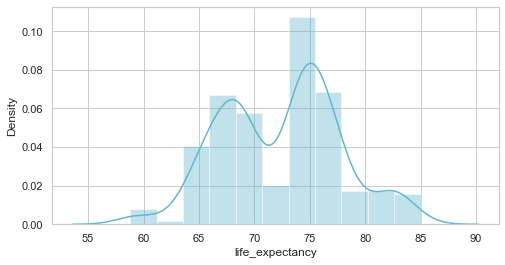

In [14]:
# Distribution of our life expectancy
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1,figsize = (8,4))
ax = sns.distplot(combine['life_expectancy'], kde = True, color = 'c')

<AxesSubplot:xlabel='national_prevalence_of_diabates(%)', ylabel='gdp'>

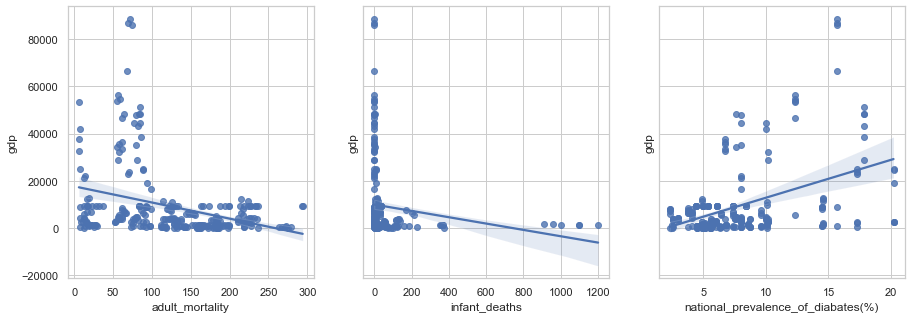

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=combine['adult_mortality'], y=combine['gdp'], ax=ax1)
sns.regplot(x=combine['infant_deaths'], y=combine['gdp'], ax=ax2)
sns.regplot(x=combine['national_prevalence_of_diabates(%)'], y=combine['gdp'], ax=ax3)

<AxesSubplot:xlabel='life_expectancy', ylabel='schooling'>

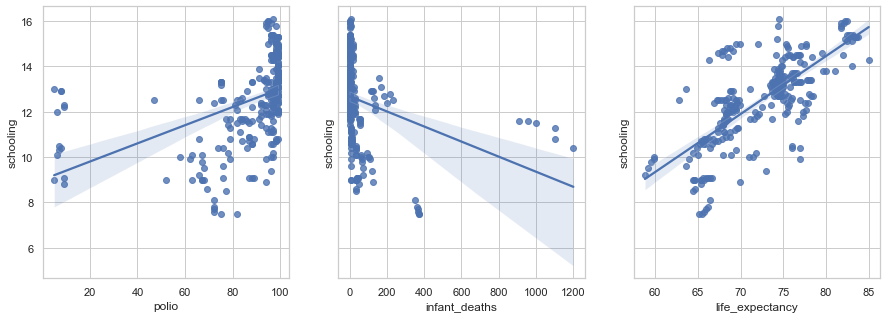

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=combine['polio'], y=combine['schooling'], ax=ax1)
sns.regplot(x=combine['infant_deaths'], y=combine['schooling'], ax=ax2)
sns.regplot(x=combine['life_expectancy'], y=combine['schooling'], ax=ax3)

In [17]:
################################ Multiple Linear Regression ################################
X = combine[['schooling','measles',
       'national_prevalence_of_diabates(%)','income_composition_of_resources']]
y = combine['life_expectancy']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
schooling,0.505247
measles,-0.000015
measles,0.107098
national_prevalence_of_diabates(%),0.008805
income_composition_of_resources,20.116393


In [21]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
64,73.9,73.284993
135,75.0,72.203072
153,67.8,74.768179
189,77.8,75.999516
253,69.2,73.258465
198,83.1,78.679107
144,78.5,73.610923
180,68.5,69.727785
256,68.5,72.677727
15,71.9,72.147098


In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.519867847532716
Mean Squared Error: 11.159776348171956
Root Mean Squared Error: 3.340625143318531


In [23]:
y1=combine['life_expectancy']
X1=combine.drop('life_expectancy',axis=1)

In [25]:
Country_dummy=pd.get_dummies(X1['country'])
status_dummy=pd.get_dummies(X1['status'])
X1.drop(['country','status'],inplace=True,axis=1)
X1=pd.concat([X1,Country_dummy,status_dummy],axis=1)

C:\Users\isis1\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25)

from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()

Linear_model.fit(X1_train,y1_train)
Linear_model.score(X1_train,y1_train)

0.9707500256761764